This is what I got from ChatGPT.  I had to add the package. To add the package I had to remove the (presumably old) plots package and resinstall it.  I know there are lots of other ways to fix this sort of thing.  The package adding etc. did not take very long. Precompiling the DE package took several minutes and gave a lot of "redefine" warnings. I did this at home and again at school. 

I had to mess around a bit at school as well. Not sure this si a complete list. I updated 

1. "JLLWrappers" which is used all over the place to connect Julia to other bits of the infrastructure. 
1. I updated Julia by installing an JuliaUp and running an update.
1. I relinked Jupyter to the updated version 1.11.6.  The following runs in the new version.
1. Wild wombats every package I can imagine updated!
    
All in all this took a lot longer than I thought it was going to. 

In [3]:
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\AllanStruthers\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\AllanStruthers\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
   Installed x265_jll ───────────────────── v4.1.0+0
   Installed GR_jll ─────────────────────── v0.73.17+0
   Installed Libmount_jll ───────────────── v2.41.1+0
   Installed LERC_jll ───────────────────── v4.0.1+0
   Installed Opus_jll ───────────────────── v1.5.2+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed libfdk_aac_jll ─────────────── v2.0.4+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.7+0
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed ConcurrentUtilities ────────── v2.5.0
   Installed Contour ────────────────────── v0.6.3
   Installed Unitful ────────────────────── v1.24.0
   Installed Xorg_xcb_util_wm_jll ───

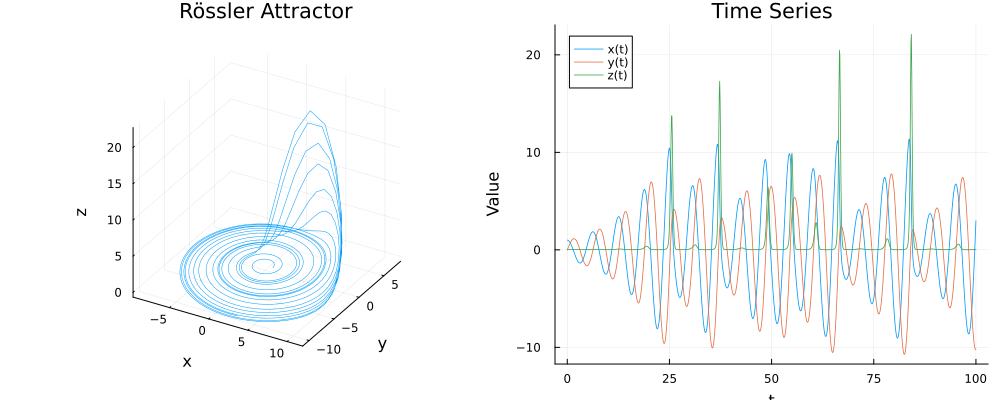

In [6]:
using DifferentialEquations
using Plots

# Define the Rössler system
function rossler!(du, u, p, t)
    a, b, c = p
    x, y, z = u
    du[1] = -y - z
    du[2] = x + a*y
    du[3] = b + z*(x - c)
end

# Parameters and initial condition
a, b, c = 0.2, 0.2, 5.7
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 100.0)
p = (a, b, c)

# Solve the system
prob = ODEProblem(rossler!, u0, tspan, p)
sol = solve(prob, Tsit5(); dt=0.01, saveat=0.1)
# refine the solution to get a smoother pic
# sol = solve(prob, Tsit5(); dt=0.01, saveat=0.01)

# Extract time and solution
t = sol.t
x = sol[1, :]
y = sol[2, :]
z = sol[3, :]

# Plot 3D phase portrait
plt1 = plot(x, y, z, lw=0.5, legend=false,
            xlabel="x", ylabel="y", zlabel="z",
            title="Rössler Attractor")

# Plot time series of x, y, z
plt2 = plot(t, x, lw=0.8, label="x(t)", xlabel="t", ylabel="Value", title="Time Series")
plot!(t, y, lw=0.8, label="y(t)")
plot!(t, z, lw=0.8, label="z(t)")

# Combine in a layout
plot(plt1, plt2, layout=(1,2), size=(1000,400))


I can solve a system with second derivatives by converting to a first order system.  
Most tools other than Mathematica will need you to do this.  Here is an example for the system from 
Dormand p163
$$
\begin{aligned}
x'' &= 2 y' + x - \frac{E(x+M)}{r_1^3} -\frac{M(x-E)}{r_2^3} \\
y'' &= -2 x' + y - \frac{E y}{r_1^3}-\frac{M y}{r_2^3} 
    \end{aligned}
$$
with for the Earth Moon System $M=1/82.45$ and $E=1-M$ and
$$
\begin{aligned}
r_1 &= \sqrt{(x+M)^2 + y^2}\\
r_2 &= \sqrt{(x-E)^2 + y^2}\\ 
\end{aligned}
$$
The intention is to solve this system with some specified initial conditions. 

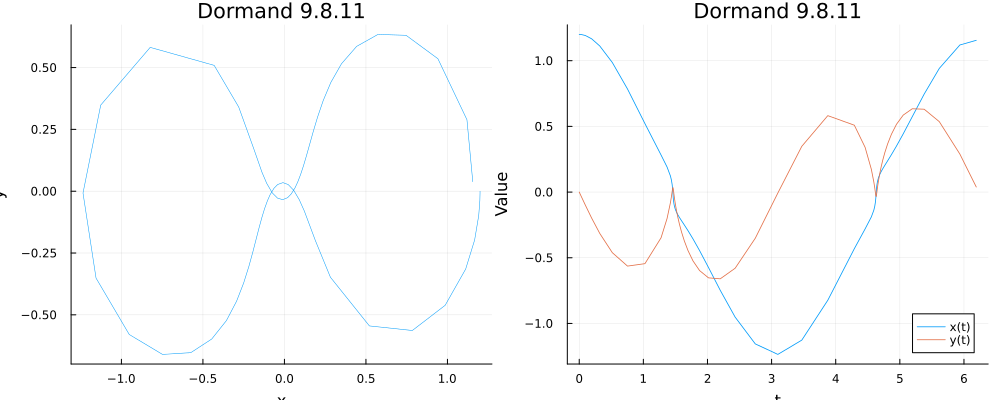

In [28]:
using DifferentialEquations
using Plots

# Define the Dormand system
function dormand!(du, u, p, t)
    m, e = p
    x, vx, y, vy = u
    r1 = sqrt((x+m)^2+y^2)
    r2 = sqrt((x-e)^2+y^2)
    du[1] = vx
    du[2] =  2*vy + x - e*(x+m)/r1^3 - m*(x-e)/r2^3
    du[3] = vy
    du[4] = -2*vx + y - e*(y)/r1^3 - m*(y)/r2^3
end

# Parameters and initial condition
m  = 1/82.45; e=1-m;
u0 = [1.2, 0.0, 0.0, -1.049357509830320]
tspan = (0.0, 6.192169331319640)
p = (m,e)

# Solve the system
prob = ODEProblem(dormand!, u0, tspan, p)
sol = solve(prob, Tsit5())
# sol = solve(prob, Tsit5();reltol = 1e-8, abstol = 1e-8)

# Extract time and solution
t = sol.t
x = sol[1, :]
y = sol[3, :]

# Plot x-y phase portrait
plt1 = plot(x, y, lw=0.5, legend=false,
            xlabel="x", ylabel="y",
            title="Dormand 9.8.11")

# Plot time series of x, y, z
plt2 = plot(t, x, lw=0.8, label="x(t)", xlabel="t", ylabel="Value", title="Dormand 9.8.11")
plot!(t, y, lw=0.8, label="y(t)")

# Combine in a layout
plot(plt1, plt2, layout=(1,2), size=(1000,400))

# Step Sizes OK actually difference between recorded tvalues. 
#plot(diff(t), yscale=:log10, xlabel="i", ylabel="h")
